# ReThink MediaCloud API User Template
---
This notebook provides a simple, stripped-down version of the user guide that can be easily adjusted and run for different topics. For more in-depth definitions, explanations, and examples for each function, please refer to [the user guide](https://github.com/lana-e/rethink-mediacloud/blob/main/notebooks/ReThink%20MediaCloud%20API%20User%20Guide.ipynb).

This template was created for the user to define everything they need in the first cell, and then run the rest of the notebook with minimal adjustment needed. Arguments can be adjusted and additional function calls can be made as needed, but a user can get meaningful analysis from this pipeline directly out of the box.

In [3]:
# importing functions from rethink_mediacloud_functions.py (MUST BE IN THE SAME FOLDER)
from rethink_mediacloud_functions import *

# defining queries and query labels
# add queries, labels, and dates as necessary
query1 = '("9/11" OR "September 11th" OR "September 11" OR \
(("terrorist attack" OR "terrorist attacks" OR "Al Qaeda") AND "New York") OR \
"twin towers" OR "world trade center" OR "bin laden" OR "ground zero" OR "WTC")'
query1_label = "9/11"
query1_dates = ["8/1/2021", "9/30/2021"]

# defining sources and collections to search for the query
# add sources and collections to dictionaries as needed
sources = {
    "Associated Press": 1154,
    "Black Agenda Report": 26040,
    "Bustle": 98755,
    "News One": 24661,
    "NPR": 1096,
    "PBS NewsHour": 271188,
    "Politico": 18268,
    "The Root": 368082,
    "Vice": 26164,
    "Al Monitor": 102745,
    "Al Jazeera English": 1148,
    "Buzzfeed": 6218,
    "Chicago Tribune": 9,
    "CNN Wire": 1095,
    "Fox News": 1092,
    "Houston Chronicle": 10,
    "HuffPost": 27502,
    "LA Times": 6,
    "Mic": 109076,
    "Middle East Eye": 107733,
    "Middle East Monitor": 97329,
    "Newsweek": 56510,
    "Reuters News": 4442,
    "Roll Call": 19854,
    "Slate": 4425,
    "Talking Points Memo": 113,
    "The Arizona Republic": 158115,
    "The Atlanta Journal Constitution": 22916,
    "The Atlantic": 1110,
    "The Boston Globe": 15,
    "Christian Science Monitor": 3,
    "The Daily Beast": 1707,
    "The Express Tribune (Pakistan)": 25888,
    "The Hill": 18364,
    "The Intercept": 269138,
    "The Miami Herald": 28,
    "New York Times": 1,
    "The Wall Street Journal": 1150,
    "The Washington Post": 2,
    "The Washington Times": 101,
    "US News and World Report": 1100,
    "USA Today": 4,
    "Vox": 104828,
    "Defense News": 39177,
    "Defense One": 69881,
    "War is Boring": 97642,
    "War on the Rocks": 72738
}
collections = {"US National Collection": 34412234}

# defining keywords, add keywords as needed
keywords = ['Guantanamo', 'commemorat*', 'anniversary']
keyword_labels = ['Guantanamo', 'commemorat*', 'anniversary']

all_keywords_str = " OR ".join(keywords)

## Story counts for queries

The cell below uses the `search_sources()` function to calculate the media attention given to the topic defined above.

In [4]:
query1_counts = search_sources(all_keywords_str, sources, query_context=query1,
                               source_type="media", date_range=query1_dates)
query1_counts.sort_values(by="Attention (%)", ascending=False).head()

# add more calls for queries and adjust parameters/arguments as necessary

Query: Guantanamo OR commemorat* OR anniversary


,Name,Relevant Stories,Total Stories,Attention (%)
MediaCloud ID,,,,
368082,The Root,3,5,60.000000
25888,The Express Tribune (Pakistan),1,2,50.000000
10,Houston Chronicle,10,23,43.478261
1095,CNN Wire,93,226,41.150442
27502,HuffPost,32,79,40.506329


In [7]:
query1_counts.sort_values(by="Relevant Stories", ascending=False).head()

,Name,Relevant Stories,Total Stories,Attention (%)
MediaCloud ID,,,,
1092,Fox News,144,420,34.285714
56510,Newsweek,118,398,29.648241
1095,CNN Wire,93,226,41.150442
4,USA Today,83,222,37.387387
1,New York Times,83,344,24.127907


## Keywords within relevant stories

The cell below uses the `calculate_percentages()` function to calculate the percentage of stories relevant to `query1` that contain the keywords defined above.

In [5]:
percentages = calculate_percentages(keywords, sources, source_type="media",
                                    date_range=query1_dates, query_context=query1)

Percentage of stories within specified context that mention:

Guantanamo: 2.91%

commemorat*: 7.13%

anniversary: 27.16%

All Keywords: 31.1%


## Wordclouds

The cell below uses the `word_cloud()` function to create a wordcloud of common words contained in stories relevant to `query1`.

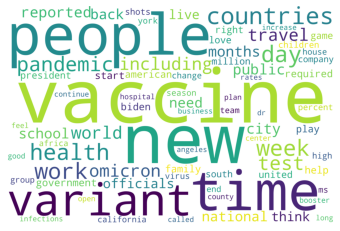

In [4]:
query1_cloud = word_cloud(query1, sources, source_type="media", date_range=query1_dates)

## Attention over time

The cell below uses the `attention_plot()` function to plot the media attention given to `keywords` within stories about `query1` over a specified time period. Feel free to adjust the `query` and `query_context` arguments as needed.

Query 0: Guantanamo
Query 1: commemorat*
Query 2: anniversary


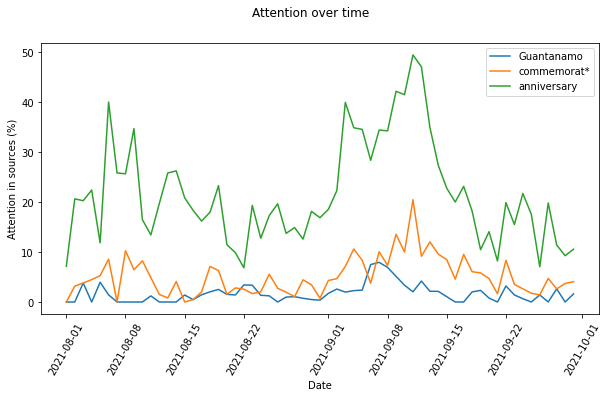

In [6]:
attention_plot = attention_plots(keywords, collections, source_type="collection", date_range=query1_dates,
                                 query_labels=keyword_labels, query_context=query1, verbose=True)

In [10]:
# Save the test_fig from the cell above as an image. Adjust the img_path and img_name variables as necessary.
img_path = "/home/lana-e/Pictures/"
img_name = "sep11_additional_keywords_attention"
attention_plot.savefig(img_path + img_name, bbox_inches="tight", facecolor="w")